In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lxml

# XML

El lenguaje de marcado extensible (XML) permite definir y almacenar datos de forma compartible. XML admite el intercambio de información entre sistemas de computación, como sitios web, bases de datos y aplicaciones de terceros.

Etiquetas XML

Los símbolos de marcado, denominados etiquetas en XML, se utilizan para definir los datos. Por ejemplo, para representar los datos de una librería, puede crear etiquetas como < libro >, < título > y < autor >. El documento XML de un solo libro tendría el siguiente contenido:

< libro >

< título >Introducción a Amazon Web Services</título>

< autor >Mark Wilkins< /autor >

< /libro >

Las etiquetas ofrecen una sofisticada codificación de datos para integrar los flujos de información en diferentes sistemas.

In [2]:
path = 'https://raw.githubusercontent.com/jamc88/Analisis-de-datos/main/books.xml'

In [3]:
perf = pd.read_xml(path) 

In [4]:
perf

,id,Author,Title,Genre,Price,PublishDate,Description
0,bk101,"Garghentini, Davide",XML Developer's Guide,Computer,44.95,2000-10-01,An in-depth look at creating applications\n ...
1,bk102,"Garcia, Debra",Midnight Rain,Fantasy,5.95,2000-12-16,"A former architect battles corporate zombies,\..."
2,bk101,Jake VanderPlas,Python Data Science Handbook,Computer,42.05,2016-08-16,"Get complete instructions for manipulating, \n..."
3,bk104,Gillian McAllister,Wrong Place Wrong Time: A Reese's Book Club Pick,Mistery,15.45,2023-04-10,New York Times bestselling author Gillian McAl...
4,bk102,William McKinney,Python for Data Analysis,Fantasy,45.20,2018-10-16,"Written by Wes McKinney, the creator of the Py..."


# Limpieza y preparación de datos

Mientras se realiza análisis y modelado de datos, se emplea una considerable cantidad de tiempo en la preparación de los mismos: carga, limpieza, transformación y reordenación. A menudo estas tareas le ocupan al analista más del 80 % de su tiempo.

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/metro_NA.csv',index_col=['fecha']) 

Datos: https://datos.cdmx.gob.mx/dataset/ingresos-del-sistema-de-transporte-colectivo-metro

In [7]:
df

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0
2022-12-31,QR/Validador,NaN,0.0


In [8]:
df.describe()

,ingreso
count,1.735900e+04
mean,2.771655e+05
std,4.117393e+05
min,0.000000e+00
25%,0.000000e+00
50%,8.805000e+03
75%,4.468910e+05
max,2.619488e+06


In [10]:
df.isna().sum()

tipo_ingreso     39
linea           102
ingreso         173
dtype: int64

**dropna** elimina por defecto cualquier fila que contiene un valor faltante:

In [11]:
df.dropna() 

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea A,163450.0
2022-01-01,Recargas,Línea 1,439332.5
2022-01-01,Recargas,Línea 2,369354.8
2022-01-01,Recargas,Línea 3,347269.8
...,...,...,...
2022-12-31,QR/Validador,Línea 1,0.0
2022-12-31,QR/Validador,Línea 2,0.0
2022-12-31,QR/Validador,Línea 4,0.0


Pasar **how='all'** quitará solamente las filas que sean todas nulas:

In [12]:
df.dropna(how='all') 

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
2022-01-01,Boletos,NaN,NaN
...,...,...,...
2022-12-31,QR/Validador,NaN,NaN
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0


Supongamos que queremos mantener solo filas que contengan como máximo un cierto número de observaciones faltantes.

In [13]:
df.dropna(thresh=2)

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
2022-01-01,Boletos,NaN,88100.0
2022-01-01,Boletos,Línea 8,NaN
...,...,...,...
2022-12-31,QR/Validador,Línea 6,NaN
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0


En lugar de filtrar datos ausentes (y posiblemente arrastrar con ellos otros datos), quizá sea más conveniente rellenar los “huecos” de distintas maneras. Para la mayoría de los casos se debe emplear el método **fillna**.

In [14]:
df.fillna(0)

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,0,0,0.0
2022-01-01,0,0,180225.0
2022-01-01,Boletos,Línea 4,0.0
2022-01-01,0,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,0,Línea 9,7590.0
2022-12-31,QR/Validador,0,0.0


Llamando a fillna con un diccionario se puede utilizar un valor de relleno distinto para cada columna:

In [15]:
df.fillna({'tipo_ingreso': 'otro', 'linea': 'x', 'ingreso':0})

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,otro,x,0.0
2022-01-01,otro,x,180225.0
2022-01-01,Boletos,Línea 4,0.0
2022-01-01,otro,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,otro,Línea 9,7590.0
2022-12-31,QR/Validador,x,0.0


In [19]:
L=[20,18,19,24,22,20,19,55,60]

In [20]:
np.mean(L)

28.555555555555557

In [21]:
np.median(L)

20.0

El método "forward fill" ("ffill"),hace que los valores no nulos se copien "hacia adelante" siempre que se encuentren valores nulos.

In [23]:
df.head(3)

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0


In [22]:
df.fillna(method='ffill')

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,180225.0
2022-01-01,Boletos,Línea 4,180225.0
2022-01-01,Boletos,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,QR/Validador,Línea 9,7590.0
2022-12-31,QR/Validador,Línea 9,0.0


In [24]:
df['ingreso'].fillna(df['ingreso'].median())

fecha
2022-01-01    324825.0
2022-01-01      8805.0
2022-01-01    180225.0
2022-01-01      8805.0
2022-01-01    134725.0
                ...   
2022-12-31      8805.0
2022-12-31      7590.0
2022-12-31         0.0
2022-12-31      8805.0
2022-12-31         0.0
Name: ingreso, Length: 17532, dtype: float64

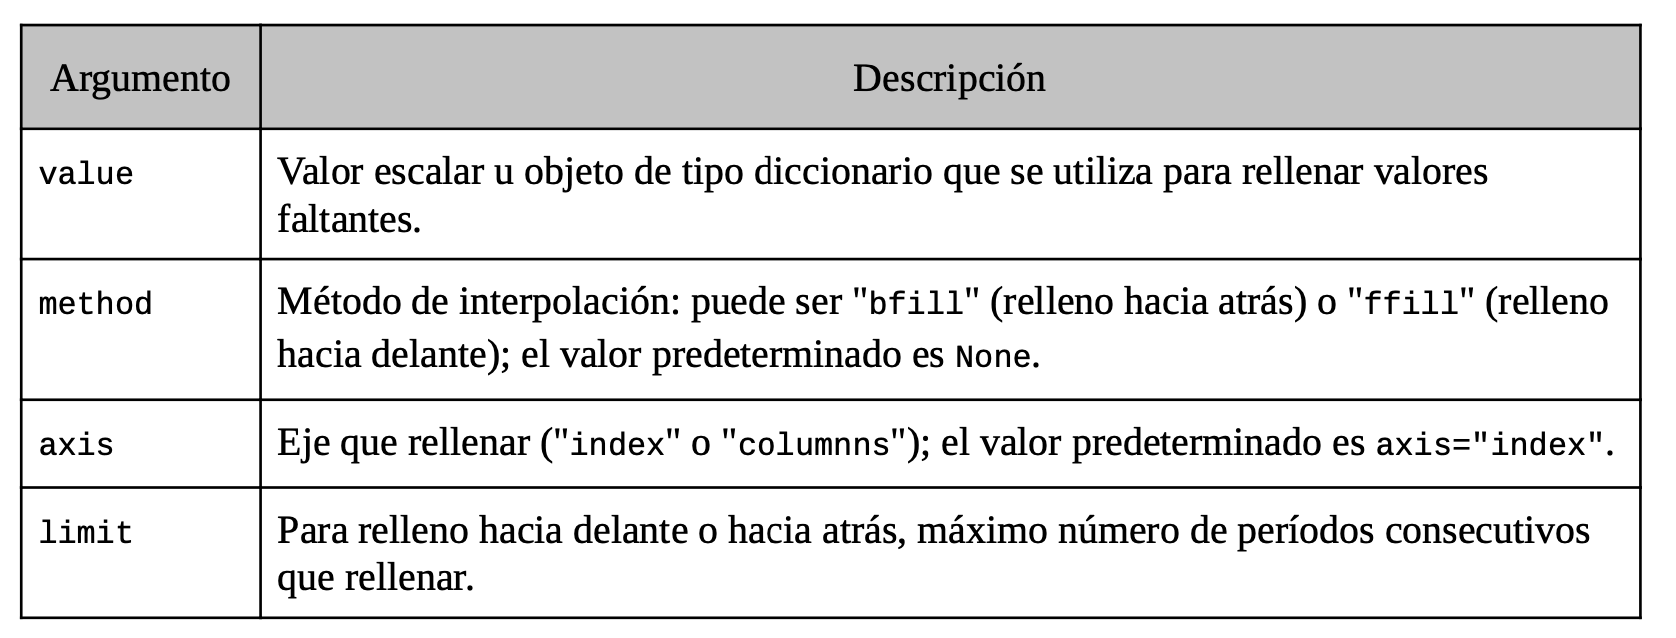

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/ingresosstc_2023_07.csv',index_col=['fecha']) 

In [27]:
df.head(20)

,tipo_ingreso,linea,ingreso
fecha,,,
2012-01-01,Boletos,Línea 1,648825.0
2012-01-01,Boletos,Línea 2,657120.0
2012-01-01,Boletos,Línea 3,466803.0
2012-01-01,Boletos,Línea 4,60120.0
2012-01-01,Boletos,Línea 5,242280.0
2012-01-01,Boletos,Línea 6,138525.0
2012-01-01,Boletos,Línea 7,138690.0
2012-01-01,Boletos,Línea 8,328383.0
2012-01-01,Boletos,Línea 9,176400.0


In [36]:
A22 = df.loc['2022-01-01':'2022-12-31']

In [37]:
A22

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 2,302150.0
2022-01-01,Boletos,Línea 3,180225.0
2022-01-01,Boletos,Línea 4,44330.0
2022-01-01,Boletos,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,QR/Validador,Línea 9,7590.0
2022-12-31,QR/Validador,Línea A,0.0


Opción 1:

In [38]:
filtro = (A22['linea']=='Línea 1')

In [39]:
A22[filtro]

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Recargas,Línea 1,439332.5
2022-01-01,Tarjetas,Línea 1,6105.0
2022-01-01,QR/Validación,Línea 1,0.0
2022-01-02,Boletos,Línea 1,676425.0
...,...,...,...
2022-12-30,QR/Validador,Línea 1,0.0
2022-12-31,Boletos,Línea 1,189585.0
2022-12-31,Recargas,Línea 1,286964.5


In [40]:
A22[filtro].groupby(['tipo_ingreso']).sum()

,linea,ingreso
tipo_ingreso,,
Boletos,Línea 1Línea 1Línea 1Línea 1Línea 1Línea 1Líne...,1.935986e+08
QR/Validación,Línea 1Línea 1Línea 1Línea 1Línea 1Línea 1Líne...,0.000000e+00
QR/Validador,Línea 1Línea 1Línea 1Línea 1Línea 1Línea 1Líne...,0.000000e+00
Recargas,Línea 1Línea 1Línea 1Línea 1Línea 1Línea 1Líne...,3.028067e+08
Tarjetas,Línea 1Línea 1Línea 1Línea 1Línea 1Línea 1Líne...,1.964235e+06


Opción 2:

In [41]:
A22.groupby(['linea','tipo_ingreso']).sum()

ingreso
linea    tipo_ingreso               
Línea 1  Boletos        1.935986e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.028067e+08
         Tarjetas       1.964235e+06
Línea 12 Boletos        0.000000e+00
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       0.000000e+00
         Tarjetas       0.000000e+00
Línea 2  Boletos        3.045251e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.458772e+08
         Tarjetas       2.844420e+06
Línea 3  Boletos        2.307642e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.158978e+08
         Tarjetas       2.421660e+06
Línea 4  Boletos        4.588458e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       5.726947e+07
         Tarjetas       2.244600e+05
Línea 5  Boletos        9.737268e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       1.522707e+08
         Tarjetas       8.673150e+05
Línea 6  Boletos        4.672255e+07
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       9.165376e+07
         Tarjetas       3.909600e+05
Línea 7  Boletos        1.072815e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       2.630049e+08
         Tarjetas       1.083240e+06
Línea 8  Boletos        1.644456e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.486327e+08
         Tarjetas       1.491855e+06
Línea 9  Boletos        1.160982e+08
         QR/Validación  3.949220e+06
         QR/Validador   4.111050e+05
         Recargas       2.696052e+08
         Tarjetas       1.419810e+06
Línea A  Boletos        1.406302e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       2.253472e+08
         Tarjetas       9.696300e+05
Línea B  Boletos        2.180905e+08
         QR/Validación  0.000000e+00
         QR/Validador   0.000000e+00
         Recargas       3.562333e+08
         Tarjetas       1.568115e+06

In [42]:
A22.isna().sum()

tipo_ingreso      0
linea             0
ingreso         152
dtype: int64

In [43]:
filtro = (A22['linea']=='Línea 12')
A22[filtro]

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 12,0.0
2022-01-01,Recargas,Línea 12,0.0
2022-01-01,Tarjetas,Línea 12,0.0
2022-01-01,QR/Validación,Línea 12,0.0
2022-01-02,Boletos,Línea 12,0.0
...,...,...,...
2022-12-30,QR/Validador,Línea 12,0.0
2022-12-31,Boletos,Línea 12,0.0
2022-12-31,Recargas,Línea 12,0.0


In [44]:
A22[filtro].isna().sum()

tipo_ingreso      0
linea             0
ingreso         152
dtype: int64

In [45]:
A22 = A22.fillna({'ingreso':0})

In [46]:
A22.isna().sum()

tipo_ingreso    0
linea           0
ingreso         0
dtype: int64

In [47]:
lineas = A22.groupby(['linea']).sum()

In [49]:
lineas=lineas.sort_values(by=['ingreso'])

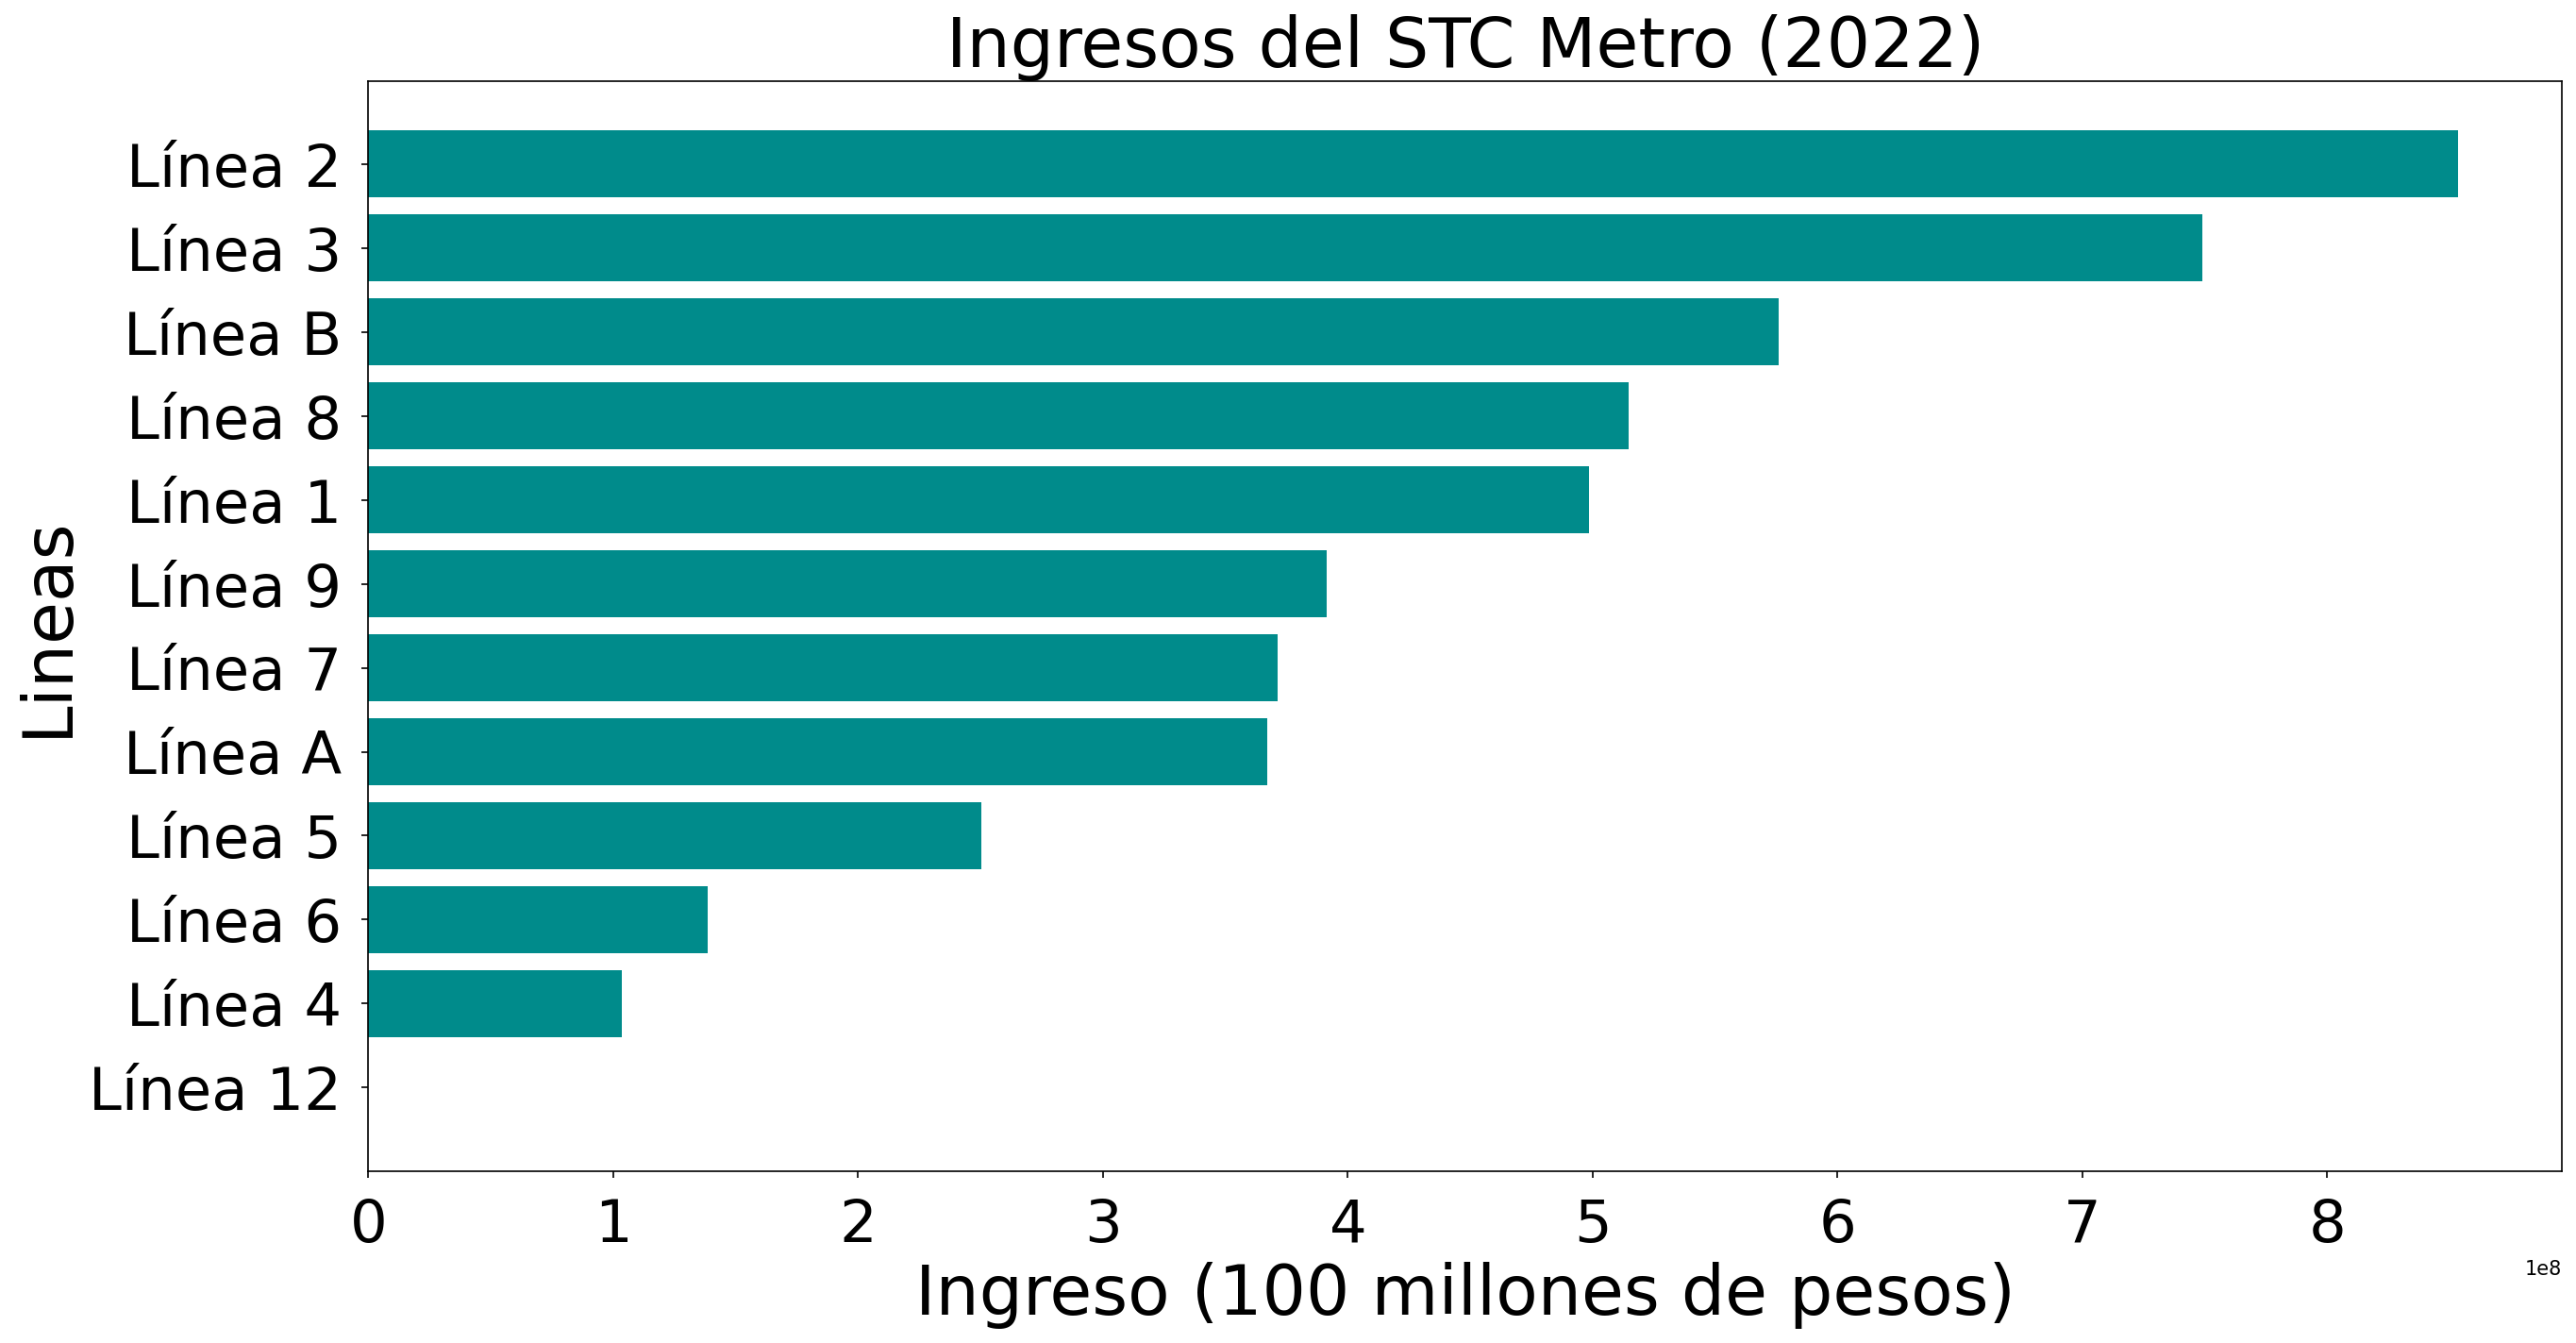

In [51]:
plt.figure(figsize=(20,10), dpi=150)
plt.barh(lineas.index,lineas["ingreso"], color='#008B8B')
plt.xlabel('Ingreso (100 millones de pesos)', fontdict = {'fontsize':35 })
plt.ylabel('Lineas',fontdict = {'fontsize':35 })
plt.title('Ingresos del STC Metro (2022)', fontsize = 35)
plt.tick_params(labelsize=30, pad=10)
plt.show()

# Eliminación de duplicados

In [53]:
cal = pd.read_csv('https://raw.githubusercontent.com/jamc88/TSMCI-Analisis-de-datos-con-Python/main/Datos/calif_dup.csv')

In [54]:
cal

,Nombre,EXAMEN 1,EXAMEN 2,EXAMEN 3,TAREAS,CALIFICACIÓN
0,ACEVEDO URIBE ULISES,10.0,10.0,10.0,10.0,MB
1,ALVAREZ MARTINEZ MICHEL,8.5,7.5,9.0,8.7,B
2,ALVAREZ SILVA LIZZETE,9.5,6.4,6.8,8.1,B
3,ALVAREZ DEL CASTILLO OLVERA DANIELA,8.0,9.3,8.8,9.8,MB
4,ARIAS SOSA INGRID ARLETTE,10.0,8.0,9.8,10.0,MB
5,BAILON ARELLANO MARIA FERNANDA,9.0,7.0,6.6,8.9,B
6,BAILON ARELLANO MARIA FERNANDA,9.0,7.0,6.6,8.9,B
7,BRAMBILA ORTIZ ODEMARIS MAYUBI,9.0,7.0,8.5,9.6,MB
8,CANTO FLORES NURIT DANAE,9.5,9.0,10.0,9.4,MB
9,CARBAJAL PACHECO MARIA FERNANDA,8.0,8.5,9.0,8.7,MB


El método **duplicated** de DataFrame devuelve una serie booleana indicando si cada fila es un duplicado

In [55]:
cal.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38     True
39     True
40    False
41    False
42    False
43    False
44    False
45    False
46    False
dtype: bool

**drop_duplicates** devuelve un dataframe con filas en las que el array duplicate es False al ser filtrado:

In [56]:
cal.drop_duplicates()

,Nombre,EXAMEN 1,EXAMEN 2,EXAMEN 3,TAREAS,CALIFICACIÓN
0,ACEVEDO URIBE ULISES,10.0,10.0,10.0,10.0,MB
1,ALVAREZ MARTINEZ MICHEL,8.5,7.5,9.0,8.7,B
2,ALVAREZ SILVA LIZZETE,9.5,6.4,6.8,8.1,B
3,ALVAREZ DEL CASTILLO OLVERA DANIELA,8.0,9.3,8.8,9.8,MB
4,ARIAS SOSA INGRID ARLETTE,10.0,8.0,9.8,10.0,MB
5,BAILON ARELLANO MARIA FERNANDA,9.0,7.0,6.6,8.9,B
7,BRAMBILA ORTIZ ODEMARIS MAYUBI,9.0,7.0,8.5,9.6,MB
8,CANTO FLORES NURIT DANAE,9.5,9.0,10.0,9.4,MB
9,CARBAJAL PACHECO MARIA FERNANDA,8.0,8.5,9.0,8.7,MB
10,CHAVEZ ANTONIO DIANA SUSANA,9.5,7.5,7.6,9.1,MB


Supongamos que queremos filtrar los duplicados basándonos solamente en la columna 'CALIFICACIÓN':

In [57]:
cal.drop_duplicates(subset=['CALIFICACIÓN'])

,Nombre,EXAMEN 1,EXAMEN 2,EXAMEN 3,TAREAS,CALIFICACIÓN
0,ACEVEDO URIBE ULISES,10.0,10.0,10.0,10.0,MB
1,ALVAREZ MARTINEZ MICHEL,8.5,7.5,9.0,8.7,B
13,DIAZ PEREZ TANIA,8.0,6.0,7.5,8.0,S
21,HERNANDEZ RAMOS CAROLINA YAZMIN,6.0,5.0,4.8,8.8,S(G)
24,LOPEZ LOPEZ LUZ ADRIANA,7.0,4.0,3.3,8.2,NaN


*duplicated* y *drop_duplicates* conservan por defecto la primera combinación de valor observada.

Pasar keep='last' devolverá la última:

In [58]:
cal.drop_duplicates(subset=['CALIFICACIÓN'], keep='last')

,Nombre,EXAMEN 1,EXAMEN 2,EXAMEN 3,TAREAS,CALIFICACIÓN
18,GREGORIO BARRAGAN ERIKA,7.0,6.3,7.5,9.0,S
21,HERNANDEZ RAMOS CAROLINA YAZMIN,6.0,5.0,4.8,8.8,S(G)
24,LOPEZ LOPEZ LUZ ADRIANA,7.0,4.0,3.3,8.2,NaN
44,VALDEZ BAEZ ALEXIS GABRIEL,9.0,9.0,6.0,9.0,B
46,ZEPEDA ARROYO SABRINA MICHELLE,9.5,9.2,10.0,9.1,MB


In [60]:
agua = pd.read_csv('consumo_agua_historico_2019.csv',index_col=['fecha_referencia'])

Datos: https://datos.cdmx.gob.mx/dataset/consumo-agua

In [61]:
agua

,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
fecha_referencia,,,,,,,,,,,,,,,
2019-06-30,2019,3,159.72,42.566364,468.23,53.240000,631.00,42.066667,3.050000,3.05,ALTO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
2019-06-30,2019,3,0.00,35.936667,107.81,0.000000,115.13,28.782500,7.320000,7.32,MEDIO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
2019-06-30,2019,3,0.00,24.586000,122.93,0.000000,197.96,32.993333,75.030000,75.03,POPULAR,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455720,-99.113582
2019-06-30,2019,3,0.00,0.000000,0.00,0.000000,253.53,84.510000,84.510000,253.53,BAJO,GERTRUDIS SANCHEZ 3A SECCION,GUSTAVO A. MADERO,19.459647,-99.104469
2019-06-30,2019,3,56.72,67.436250,539.49,56.720000,839.35,76.304545,121.570000,243.14,BAJO,PRO HOGAR I,AZCAPOTZALCO,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28,2019,1,NaN,20.053112,3930.41,NaN,4286.28,19.307568,13.687308,355.87,BAJO,GUERRERO I,CUAUHTEMOC,19.448564,-99.139940
2019-02-28,2019,1,71.30,21.126615,9549.24,35.650001,9796.12,20.976702,13.506923,175.59,POPULAR,GUERRERO I,CUAUHTEMOC,19.449339,-99.145719
2019-02-28,2019,1,759.16,27.527778,4707.25,94.894999,5692.81,29.344381,15.093334,226.40,BAJO,GUERRERO I,CUAUHTEMOC,19.448392,-99.145930


In [62]:
agua.isna().sum()

anio                       0
bimestre                   0
consumo_total_mixto     8327
consumo_prom_dom        4820
consumo_total_dom       4820
consumo_prom_mixto      8327
consumo_total              0
consumo_prom               0
consumo_prom_no_dom        0
consumo_total_no_dom       0
indice_des                 0
colonia                  216
alcaldia                 216
latitud                    0
longitud                   0
dtype: int64

In [63]:
filtro = (agua['alcaldia']=='IZTAPALAPA')
agua[filtro]

,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
fecha_referencia,,,,,,,,,,,,,,,
2019-06-30,2019,3,0.0,0.00,0.00,0.0,426.39,213.195000,213.195000,426.39,POPULAR,CONSTITUCION DE 1917 II,IZTAPALAPA,19.350551,-99.058122
2019-06-30,2019,3,0.0,0.00,0.00,0.0,0.00,0.000000,0.000000,0.00,BAJO,SANTA MARTHA ACATITLA,IZTAPALAPA,19.372634,-99.026868
2019-06-30,2019,3,0.0,0.00,0.00,0.0,839.36,279.786667,279.786667,839.36,POPULAR,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.351650,-99.047017
2019-06-30,2019,3,0.0,14.03,14.03,0.0,18.32,4.580000,1.430000,4.29,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350693,-99.044110
2019-06-30,2019,3,0.0,21.35,21.35,0.0,158.60,52.866667,68.625000,137.25,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350773,-99.044983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28,2019,1,NaN,NaN,NaN,NaN,3734.10,466.762509,466.762509,3734.10,POPULAR,ERMITA ZARAGOZA (U HAB) II,IZTAPALAPA,19.364859,-98.997922
2019-02-28,2019,1,NaN,NaN,NaN,NaN,9.17,9.170000,9.170000,9.17,BAJO,ERMITA ZARAGOZA (U HAB) I,IZTAPALAPA,19.362170,-98.996594
2019-02-28,2019,1,NaN,NaN,NaN,NaN,0.00,0.000000,0.000000,0.00,POPULAR,ERMITA ZARAGOZA (U HAB) I,IZTAPALAPA,19.364762,-99.000788


In [64]:
a_iz = agua[filtro]

In [65]:
a_iz.head(6)

,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
fecha_referencia,,,,,,,,,,,,,,,
2019-06-30,2019,3,0.0,0.00,0.00,0.0,426.39,213.195000,213.195000,426.39,POPULAR,CONSTITUCION DE 1917 II,IZTAPALAPA,19.350551,-99.058122
2019-06-30,2019,3,0.0,0.00,0.00,0.0,0.00,0.000000,0.000000,0.00,BAJO,SANTA MARTHA ACATITLA,IZTAPALAPA,19.372634,-99.026868
2019-06-30,2019,3,0.0,0.00,0.00,0.0,839.36,279.786667,279.786667,839.36,POPULAR,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.351650,-99.047017
2019-06-30,2019,3,0.0,14.03,14.03,0.0,18.32,4.580000,1.430000,4.29,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350693,-99.044110
2019-06-30,2019,3,0.0,21.35,21.35,0.0,158.60,52.866667,68.625000,137.25,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350773,-99.044983
2019-06-30,2019,3,0.0,0.00,0.00,0.0,162.87,162.870000,162.870000,162.87,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.349552,-99.047087


In [66]:
a_iz.isna().sum()

anio                       0
bimestre                   0
consumo_total_mixto     1796
consumo_prom_dom        1578
consumo_total_dom       1578
consumo_prom_mixto      1796
consumo_total              0
consumo_prom               0
consumo_prom_no_dom        0
consumo_total_no_dom       0
indice_des                 0
colonia                    0
alcaldia                   0
latitud                    0
longitud                   0
dtype: int64

Podemos reemplazar los valores NA por 0 con la función **replace**

In [68]:
a_iz.replace(np.nan, 0)

,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
fecha_referencia,,,,,,,,,,,,,,,
2019-06-30,2019,3,0.0,0.00,0.00,0.0,426.39,213.195000,213.195000,426.39,POPULAR,CONSTITUCION DE 1917 II,IZTAPALAPA,19.350551,-99.058122
2019-06-30,2019,3,0.0,0.00,0.00,0.0,0.00,0.000000,0.000000,0.00,BAJO,SANTA MARTHA ACATITLA,IZTAPALAPA,19.372634,-99.026868
2019-06-30,2019,3,0.0,0.00,0.00,0.0,839.36,279.786667,279.786667,839.36,POPULAR,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.351650,-99.047017
2019-06-30,2019,3,0.0,14.03,14.03,0.0,18.32,4.580000,1.430000,4.29,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350693,-99.044110
2019-06-30,2019,3,0.0,21.35,21.35,0.0,158.60,52.866667,68.625000,137.25,BAJO,SANTA CRUZ MEYEHUALCO (U HAB) II,IZTAPALAPA,19.350773,-99.044983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28,2019,1,0.0,0.00,0.00,0.0,3734.10,466.762509,466.762509,3734.10,POPULAR,ERMITA ZARAGOZA (U HAB) II,IZTAPALAPA,19.364859,-98.997922
2019-02-28,2019,1,0.0,0.00,0.00,0.0,9.17,9.170000,9.170000,9.17,BAJO,ERMITA ZARAGOZA (U HAB) I,IZTAPALAPA,19.362170,-98.996594
2019-02-28,2019,1,0.0,0.00,0.00,0.0,0.00,0.000000,0.000000,0.00,POPULAR,ERMITA ZARAGOZA (U HAB) I,IZTAPALAPA,19.364762,-99.000788


In [69]:
a_iz=a_iz.replace(np.nan, 0)

In [70]:
a_iz.isna().sum()

anio                    0
bimestre                0
consumo_total_mixto     0
consumo_prom_dom        0
consumo_total_dom       0
consumo_prom_mixto      0
consumo_total           0
consumo_prom            0
consumo_prom_no_dom     0
consumo_total_no_dom    0
indice_des              0
colonia                 0
alcaldia                0
latitud                 0
longitud                0
dtype: int64